# Graphics

This is a sample for plotting with Python. There are 2 principal libraries for plotting,

* the library [matplotlib](https://matplotlib.org/) that it has many utilities like [mplfinance](https://github.com/matplotlib/mplfinance) for the visualization, and visual analysis, of financial data
* the library [plotly](https://plotly.com/python/>) that it is a very interesting tool makes interactive and publication-quality graphs

With **pandas_datareader** library you can download the historical data and with pandas library you can make the data range.

In [1]:
# initialization
import pandas as pd
from pandas_datareader import data as pdr
start='2017-10-30'
end='2020-10-08'
amzn = pdr.DataReader('AMZN', 'yahoo', start, end)
# simple indicators
amzn['SMA25'] = amzn['Close'].rolling(25).mean()
amzn['EMA25'] = amzn['Close'].ewm(span=25, adjust=False).mean()
amzn['STD25'] = amzn['Close'].rolling(25).std()
amzn['Upper Band'] = amzn['SMA25'] + (amzn['STD25'] * 2)
amzn['Lower Band'] = amzn['SMA25'] - (amzn['STD25'] * 2)
# data ranges
all_bm = pd.date_range(start=start, end=end, freq='BM')
all_range = pd.date_range(start=start, end=end)
amzn_bm = amzn.reindex(all_bm)
amzn_bm_all = amzn_bm.reindex(all_range)
amzn_all = amzn.reindex(all_range)
piece_d = pd.date_range(start='2020-01-01', end='2020-10-01')
amzn_bm_piece_d = amzn_bm.reindex(piece_d)
amzn_piece_d = amzn.reindex(piece_d)
piece_bm = pd.date_range(start='2020-01-01', end='2020-10-01', freq='BM')
amzn_bm_piece_bm = amzn_bm.reindex(piece_bm)

**Matplotlib** is very powerful: you can add tracks with different date range.

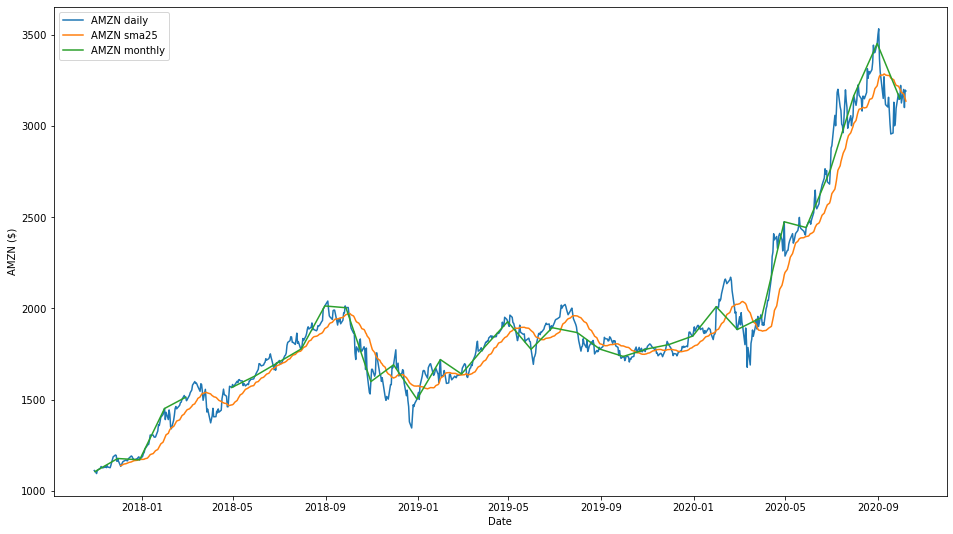

In [2]:
# plot with daily, monthly and sma 25
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(amzn['Close'].index, amzn['Close'], label='AMZN daily')
ax.plot(amzn['SMA25'].index, amzn['SMA25'], label='AMZN sma25')
ax.plot(amzn_bm['Close'].index, amzn_bm['Close'], label='AMZN monthly')
ax.set_xlabel('Date')
ax.set_ylabel('AMZN ($)')
ax.legend()
plt.show()
#plt.savefig('plot.with.daily.monthly.sma.25.png')

**mplfinance** contains the matplotlib finance API that makes it easier to create financial plots.

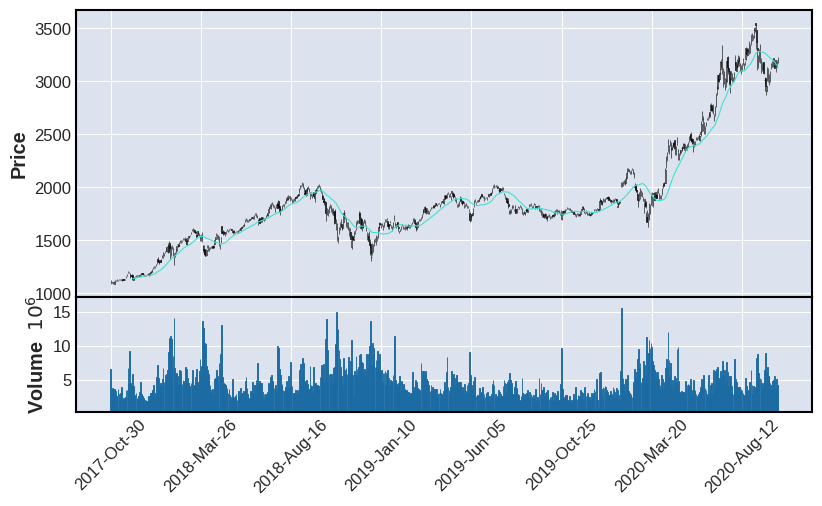

In [3]:
# plot with candle daily and sma 25
!pip install mplfinance
import mplfinance as mpf
kwargs = dict(type='candle',mav=(25),volume=True,figratio=(16,9),figscale=1)
mpf.plot(amzn,**kwargs)
#plt.savefig('plot.with.candle.daily.sma.25.png')

There are many [styles](https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb) to customize your graphs.

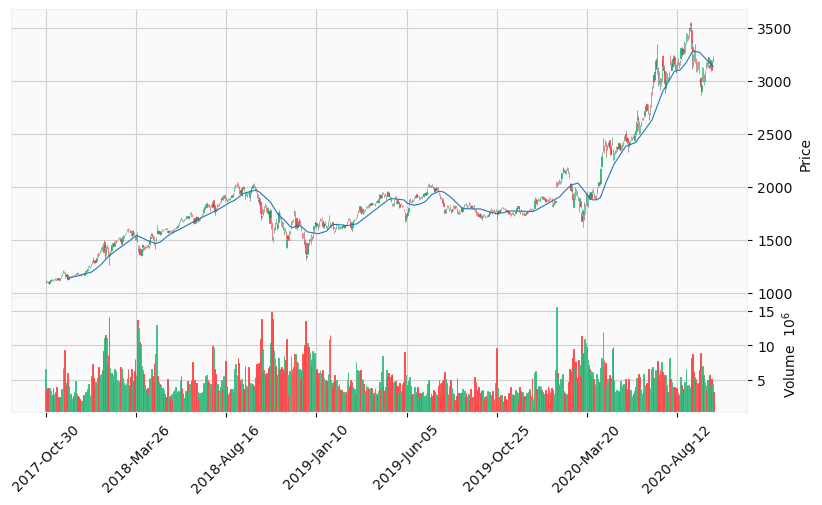

In [4]:
# plot with candle daily, sma 25 and yahoo style
mpf.plot(amzn,**kwargs,style='yahoo')
#plt.savefig('plot.with.candle.daily.sma.25.yahoo.style.png')

You can add an [array of plots](https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb) that each has to be a dateframe.

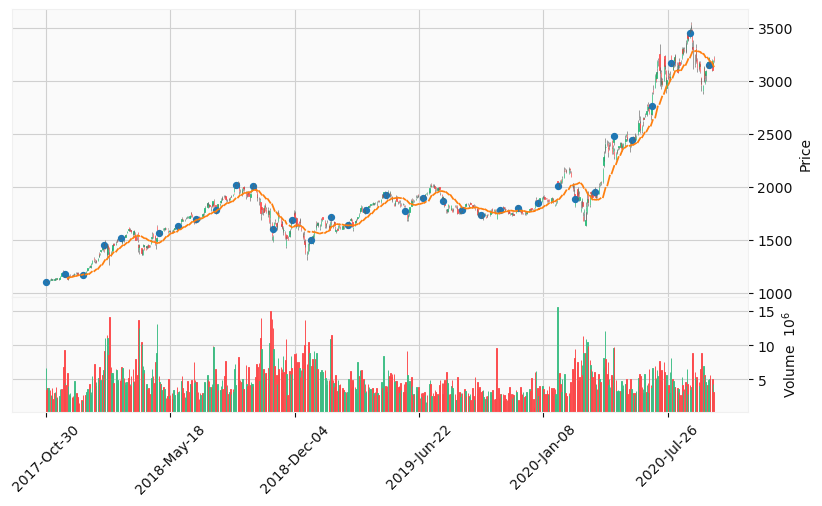

In [5]:
# plot with candle daily, monthly points, sma 25 and yahoo style
aps = [
    mpf.make_addplot(amzn_all['SMA25']),
    mpf.make_addplot(amzn_bm_all['Close'],type='scatter')
] 
mpf.plot(amzn_all,**kwargs,style='yahoo',addplot=aps)
#plt.savefig('plot.with.candle.daily.monthly.points.sma.25.yahoo.style.png')

You can enlarge a window to observe that the weeks are not contiguous.

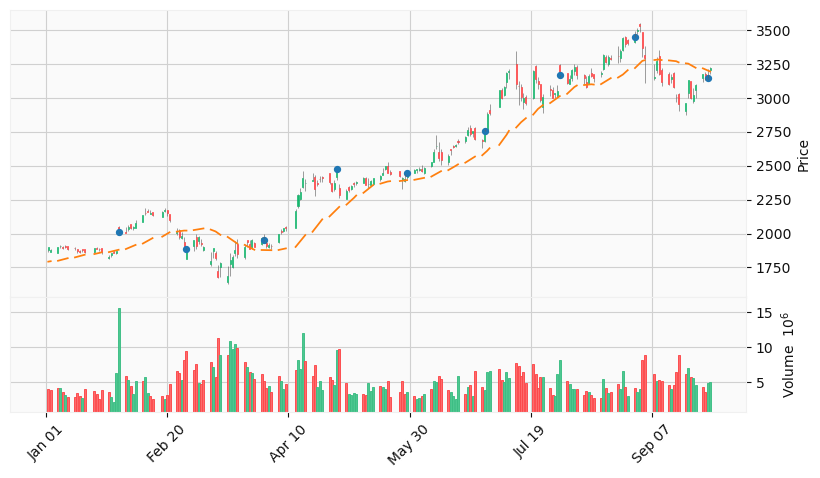

In [6]:
# plot with candle daily, monthly points, sma 25 and yahoo style on a little date range
aps = [
    mpf.make_addplot(amzn_piece_d['SMA25']),
    mpf.make_addplot(amzn_bm_piece_d['Close'],type='scatter')
] 
mpf.plot(amzn_piece_d,**kwargs,style='yahoo',addplot=aps)
#plt.savefig('plot.with.candle.daily.monthly.points.sma.25.yahoo.style.little.range.png')

You can add an array of simple lines date-value or other [specific lines](https://github.com/matplotlib/mplfinance/blob/master/examples/using_lines.ipynb) for trends, support, resistance, and trading.

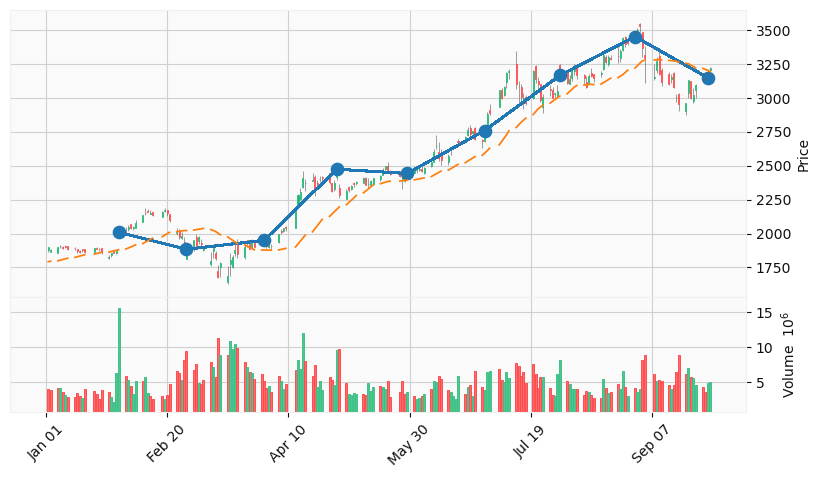

In [7]:
# plot with candle daily, monthly points and monthly line, sma 25 and yahoo style on a little date range
subset = pd.DataFrame(amzn_bm_piece_bm['Close'])
amzn_bm_line = list(subset.itertuples(index=True, name=None))
aps = [
    mpf.make_addplot(amzn_piece_d['SMA25']),
    mpf.make_addplot(amzn_bm_piece_d['Close'],type='scatter',markersize=78)
] 
mpf.plot(amzn_piece_d,**kwargs,style='yahoo',addplot=aps,alines=amzn_bm_line)
#plt.savefig('plot.with.candle.daily.monthly.points.monthly.line.sma.25.yahoo.style.little.range.png')

You can also plot with matplotlib style for having more customization like legend.

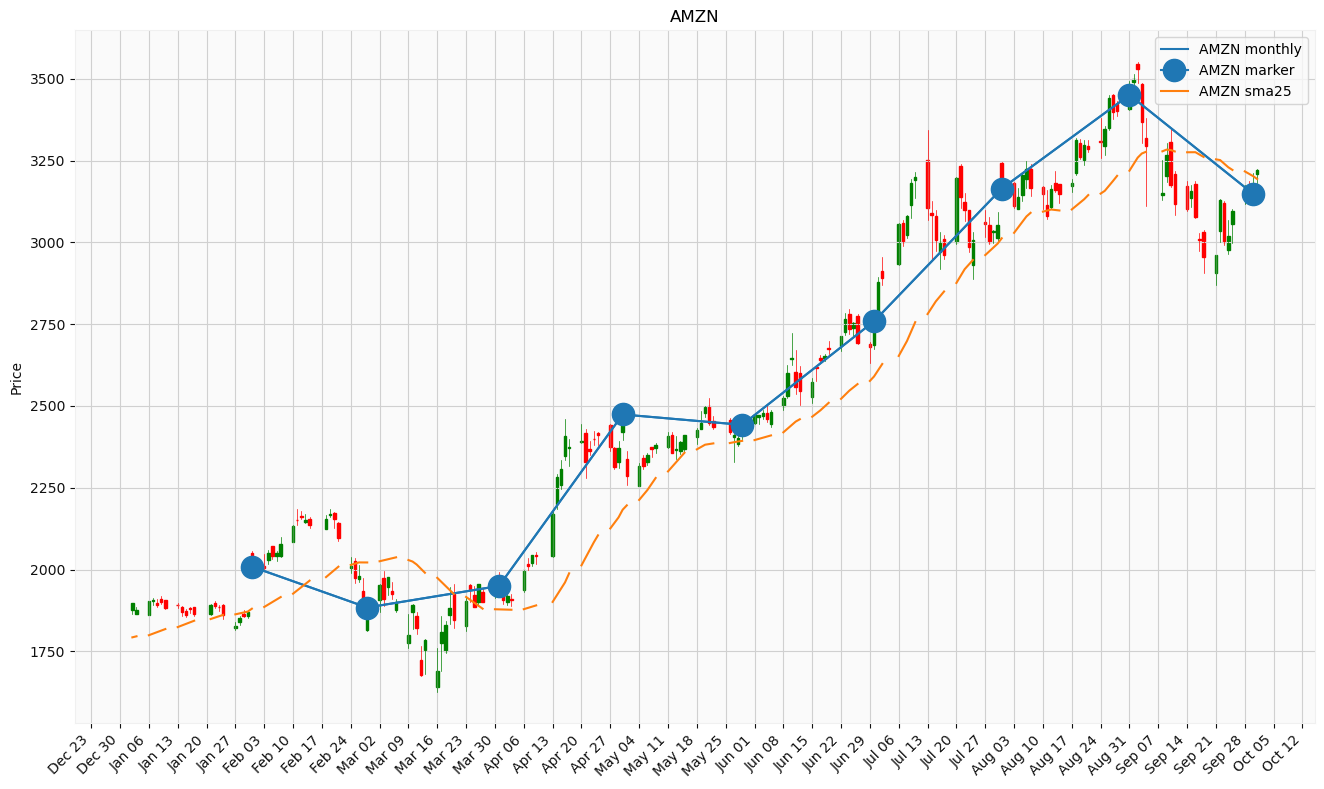

In [8]:
# the previous plot with matplotlib style plus old finance modules
import matplotlib.dates as mdates
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator
from mplfinance.original_flavor import candlestick_ohlc

# configurations
fig, ax = plt.subplots(figsize=(16,9))

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12
ax.xaxis.set_major_locator(mondays)
#ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
#ax.xaxis.set_minor_formatter(dayFormatter)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# grid
plt.rc('axes', grid=True)

# the plots
candlestick_ohlc(ax, zip(mdates.date2num(amzn_piece_d.index.to_pydatetime()),
                 amzn_piece_d['Open'], amzn_piece_d['High'],amzn_piece_d['Low'], amzn_piece_d['Close']),
                 colorup='g', colordown='r', width=0.6)
ax.plot(amzn_bm_piece_bm['Close'].index, amzn_bm_piece_bm['Close'], label='AMZN monthly')
ax.plot(amzn_bm_piece_bm['Close'].index, amzn_bm_piece_bm['Close'], label='AMZN marker', marker='o', markersize=16, color='C0')
ax.plot(amzn_piece_d['SMA25'].index, amzn_piece_d['SMA25'], label='AMZN sma25')

# other configurations
ax.set_title('AMZN')
#ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()
#plt.savefig('plot.with.candle.daily.monthly.points.monthly.line.sma.25.matplotlib.style.little.range.png')

Another customization could be to remove the gaps.

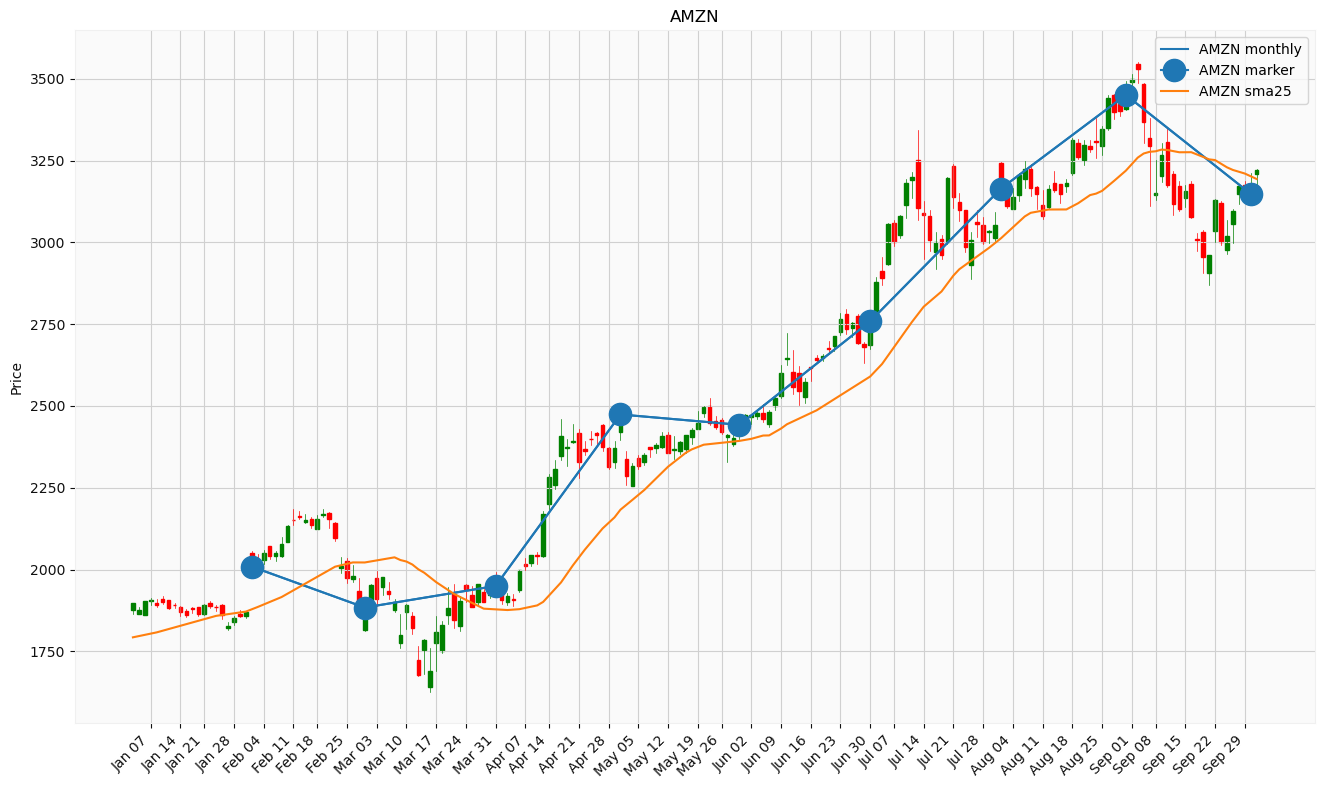

In [9]:
# the previous plot with matplotlib style without gaps
import numpy as np

# configurations
fig, ax = plt.subplots(figsize=(16,9))

# remove the gaps
data = pd.DataFrame(amzn_piece_d.dropna())
# Preserve dates to be re-labelled later.
x_dates = data.index.to_pydatetime()
# Override data['date'] with a list of incrementatl integers.
#   This will not create gaps in the candle stick graph.
data_size = len(x_dates)
data['Date'] = np.arange(start = 0, stop = data_size, step = 1, dtype='int')
# Re-arrange so that each line contains values of a day: 'date','open','high','low','close'.
quotes = [tuple(x) for x in data[['Date','Open','High','Low','Close']].values]

# Go through each x-tick label and rename it.
x_tick_labels = []
x_tick_positions = []
x_bm_line = []
for l_date in x_dates:
    date_str = ''
#    if l_date.strftime('%A') == 'Monday':
    if l_date.strftime('%A') == 'Tuesday':
        date_str = l_date.strftime('%b %d')
        x_tick_labels.append(date_str)
        x_tick_positions.append(list(x_dates).index(l_date))
    for date in amzn_bm_piece_bm.index:
        if l_date == date:
            x_bm_line.append(list(x_dates).index(l_date))
ax.set(xticks=x_tick_positions, xticklabels=x_tick_labels)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# grid
plt.rc('axes', grid=True)

# the plots
candlestick_ohlc(ax, quotes, colorup='g', colordown='r', width=0.6)
ax.plot(x_bm_line, amzn_bm_piece_bm['Close'], label='AMZN monthly')
ax.plot(x_bm_line, amzn_bm_piece_bm['Close'], label='AMZN marker', marker='o', markersize=16, color='C0')
ax.plot(data['Date'], data['SMA25'], label='AMZN sma25')

# other configurations
ax.set_title('AMZN')
#ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()
#plt.savefig('plot.with.candle.daily.monthly.points.monthly.line.sma.25.matplotlib.style.little.range.without.gaps.png')

And to add the volume like bars.

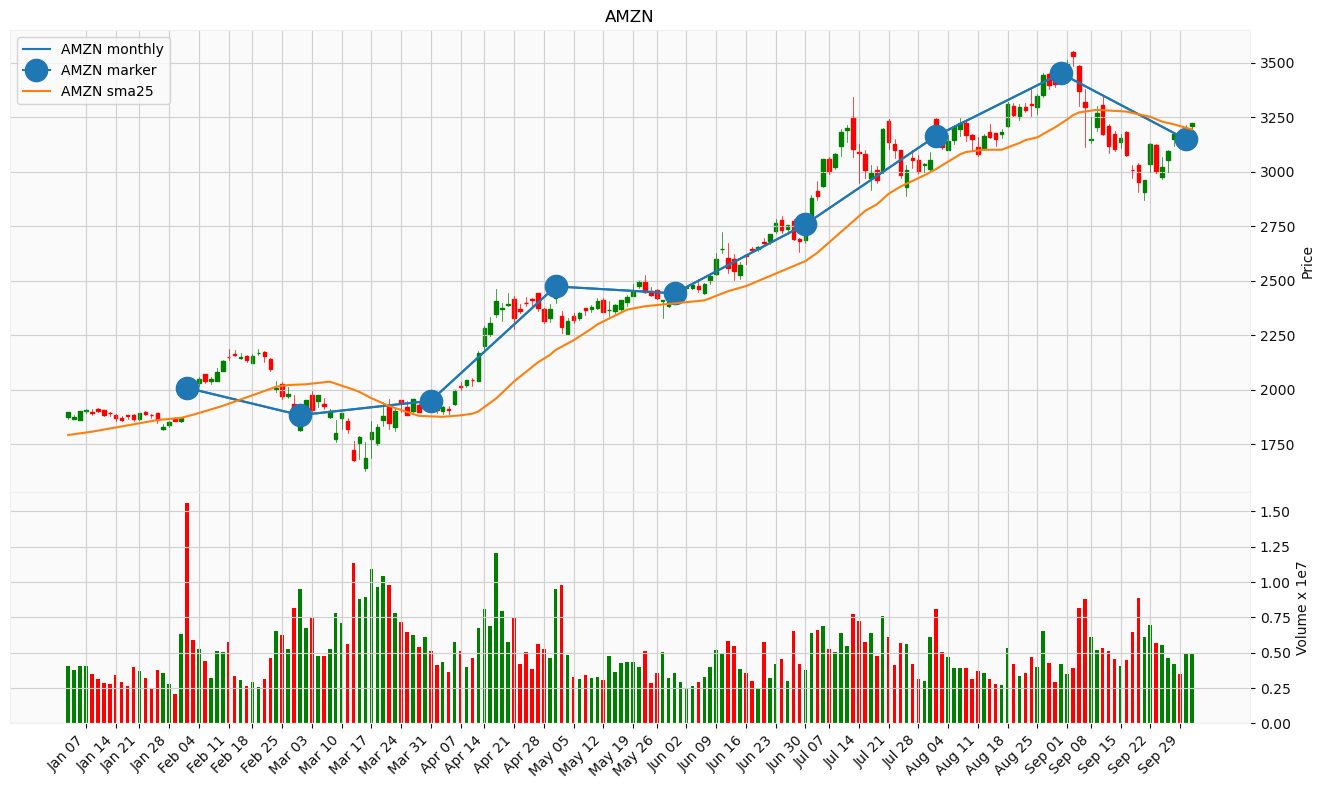

In [10]:
# the previous plot with matplotlib style without gaps plus volume

# configurations
fig, ax = plt.subplots(figsize=(16,9))
ax = plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=2)
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax2 = plt.subplot2grid((3,3), (2,0), colspan=3)
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()
#ax.axes.get_xaxis().set_visible(False)
fig.subplots_adjust(hspace=0)

# remove the gaps
data = pd.DataFrame(amzn_piece_d.dropna())
# Preserve dates to be re-labelled later.
x_dates = data.index.to_pydatetime()
# Override data['date'] with a list of incrementatl integers.
#   This will not create gaps in the candle stick graph.
data_size = len(x_dates)
data['Date'] = np.arange(start = 0, stop = data_size, step = 1, dtype='int')
# Re-arrange so that each line contains values of a day: 'date','open','high','low','close'.
quotes = [tuple(x) for x in data[['Date','Open','High','Low','Close']].values]

# Go through each x-tick label and rename it.
x_tick_labels_empty = []
x_tick_labels = []
x_tick_positions = []
x_bm_line = []
for l_date in x_dates:
    date_str = ''
#    if l_date.strftime('%A') == 'Monday':
    if l_date.strftime('%A') == 'Tuesday':
        date_str = l_date.strftime('%b %d')
        x_tick_labels.append(date_str)
        x_tick_labels_empty.append('')
        x_tick_positions.append(list(x_dates).index(l_date))
    for date in amzn_bm_piece_bm.index:
        if l_date == date:
            x_bm_line.append(list(x_dates).index(l_date))
#ax.set(xticks=x_tick_positions, xticklabels=x_tick_labels)
ax.set(xticks=x_tick_positions, xticklabels=x_tick_labels_empty)
ax2.set(xticks=x_tick_positions, xticklabels=x_tick_labels)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# grid
plt.rc('axes', grid=True)

# the plots
candlestick_ohlc(ax, quotes, colorup='g', colordown='r', width=0.6)
ax.plot(x_bm_line, amzn_bm_piece_bm['Close'], label='AMZN monthly')
ax.plot(x_bm_line, amzn_bm_piece_bm['Close'], label='AMZN marker', marker='o', markersize=16, color='C0')
ax.plot(data['Date'], data['SMA25'], label='AMZN sma25')

# make bar plots and color differently depending on up/down for the day
pos = data['Open']-data['Close']<0
neg = data['Open']-data['Close']>0
ax2.bar(data['Date'][pos],data['Volume'][pos],color='green',width=0.6,align='center')
ax2.bar(data['Date'][neg],data['Volume'][neg],color='red',width=0.6,align='center')

# other configurations
ax.set_title('AMZN')
#ax2.set_xlabel('Date')
ax.set_ylabel('Price')
ax2.set_ylabel('Volume x 1e7')
# avoid scientific notation (1e7)
ax2.get_yaxis().get_offset_text().set_visible(False)
ax.legend()
plt.show()
#plt.savefig('plot.with.candle.daily.monthly.points.monthly.line.sma.25.matplotlib.style.little.range.without.gaps.plus.volume.png')

**Matplotlib** is an advanced library for plotting everything you want, but maybe at the beginning, you need only to add the standard indicators.

It is simple to add **Simple Moving Averages** (SMA) with **mplfinance**, but this library contains only this indicator.

There are [many libraries](https://github.com/topics/ta-lib) that they are a copy of [TA-lib](http://ta-lib.org/), an historical library of Technical Analisys.

* some libraries are a wrapper of the original **TA-lib**, like [mrjbq7/ta-lib](https://github.com/mrjbq7/ta-lib), and it needs the original TA-lib is installed
* some libraries are a wrapper of the **Matplotlib**, like [ricequant/rqalpha](https://github.com/ricequant/rqalpha)
* many libraries create plots, calculate indicators and make backtesting starting from the previous ones: you only have to choose what you like best

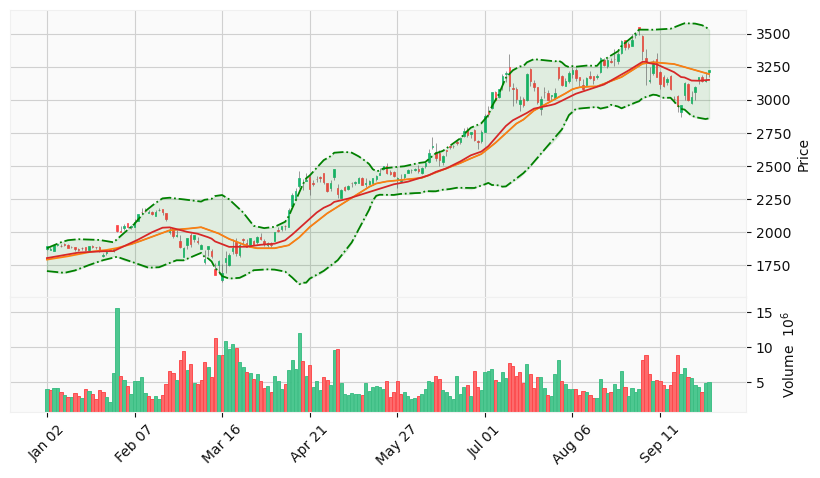

In [11]:
# plot with candle daily, sma 25, ema 25 and yahoo style without gaps
data = pd.DataFrame(amzn_piece_d.dropna())
aps = [
    mpf.make_addplot(data['SMA25'],color='C1'), # orange
    mpf.make_addplot(data['EMA25'],color='C3'), # red
    mpf.make_addplot(data['Upper Band'],linestyle='-.',color='g'),
    mpf.make_addplot(data['Lower Band'],linestyle='-.',color='g'),
] 
mpf.plot(data,**kwargs,style='yahoo',addplot=aps,fill_between=dict(y1=data['Lower Band'].values,y2=data['Upper Band'].values,alpha=0.1,color='g'))
#plt.savefig('plot.with.candle.daily.sma.25.ema.25.yahoo.style.without.gaps.png')